<a href="https://colab.research.google.com/github/abookvv/Math-Analysis-FirstYear/blob/main/%D0%A2%D0%B8%D0%BF%D0%BE%D0%B2%D0%B8%D0%BA2_2%5C%D0%A2%D0%B8%D0%BF%D0%BE%D0%B2%D0%B8%D0%BA2_2%D1%80%D0%B5%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import numpy as np
import plotly
import matplotlib

# загрузка изображения

In [4]:
# Загружаем изображение
image = Image.open('Yozhik.jpg')
image_array = np.array(image)   # Преобразуем в numpy-массив

# разделение на r, g, b каналы


Цветное изображение в формате RGB хранится как трёхмерный массив (height, width, 3), где:

1. image_array[:, :, 0]  — красный канал (R),
2. image_array[:, :, 1] — зелёный канал (G),
3. image_array[:, :, 2] — синий канал (B).


In [5]:
# Разделение на каналы (R, G, B)
r = image_array[:, :, 0]
g = image_array[:, :, 1]
b = image_array[:, :, 2]

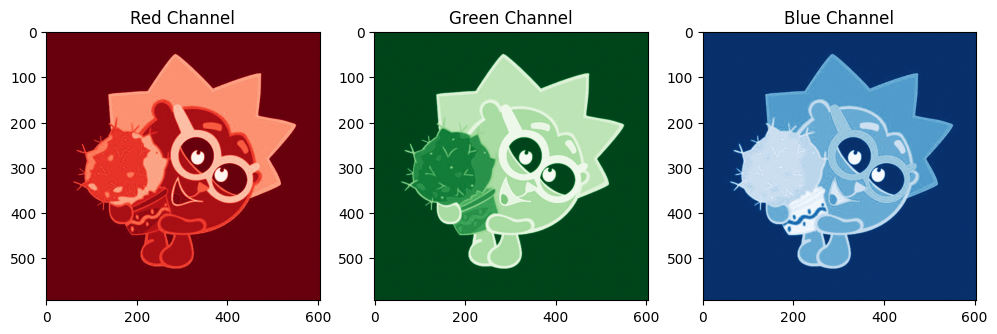

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(r, cmap='Reds')
plt.title("Red Channel")

plt.subplot(1, 3, 2)
plt.imshow(g, cmap='Greens')
plt.title("Green Channel")

plt.subplot(1, 3, 3)
plt.imshow(b, cmap='Blues')
plt.title("Blue Channel")

plt.show()

In [8]:
def comb_channels (ch_1,ch_2,ch_0): # комбинируем 2 канала и обнуляем 3ий
    combined = np.zeros_like(image_array)  # создаем пустой массив
    combined[:, :, 0] = ch_1 if ch_0 != 'R' else 0
    combined[:, :, 1] = ch_2 if ch_0 != 'G' else 0
    combined[:, :, 2] = 0 if ch_0 == 'B' else b
    return combined


In [9]:
# комбинируем каналы
rg = comb_channels(r, g, 'B')
gb = comb_channels(g, b, 'R')
rb = comb_channels(r, b, 'G')

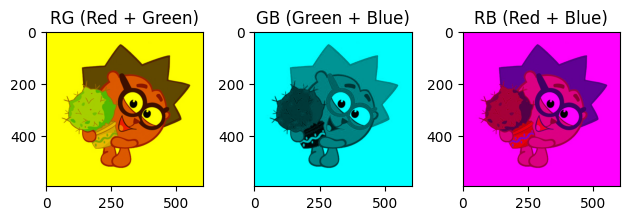

In [10]:
# визуализация
plt.subplot(2, 3, 4)
plt.imshow(rg)
plt.title("RG (Red + Green)")

plt.subplot(2, 3, 5)
plt.imshow(gb)
plt.title("GB (Green + Blue)")

plt.subplot(2, 3, 6)
plt.imshow(rb)
plt.title("RB (Red + Blue)")

plt.tight_layout()
plt.show()

##**серое изображение**##

воспользуемся формулой:

$$
\text{Gray} = 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B
$$

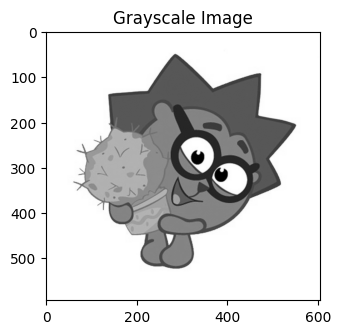

In [11]:
g = 0.299 * r + 0.587 * g + 0.114 * b
g = g.astype(np.uint8)  # приведение к целочисленному типу [0, 255]

#визуализация
plt.subplot(1, 2, 2)
plt.imshow(g, cmap='gray')
plt.title("Grayscale Image")

plt.tight_layout()
plt.show()

In [12]:
Image.fromarray(g).save("gray_image.jpg")

##**рассмотрим изменение чатсоты (яркости) каналов по строкам**##


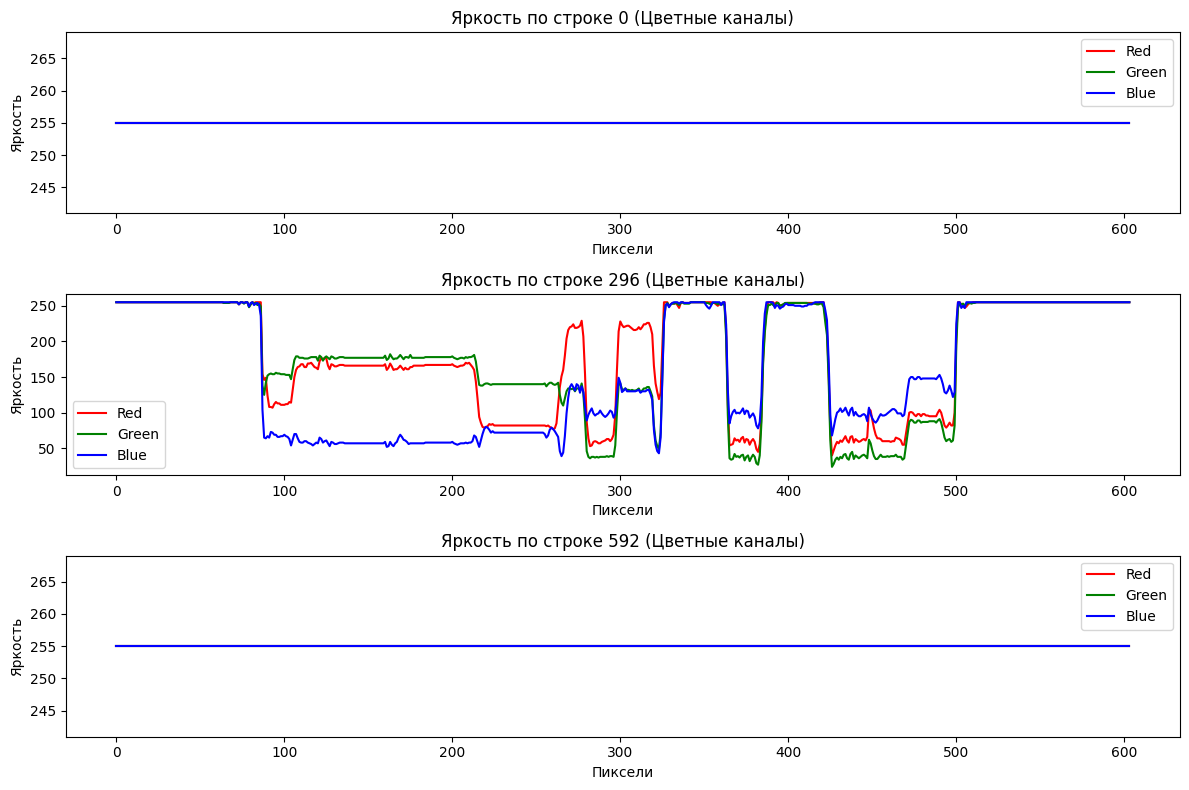

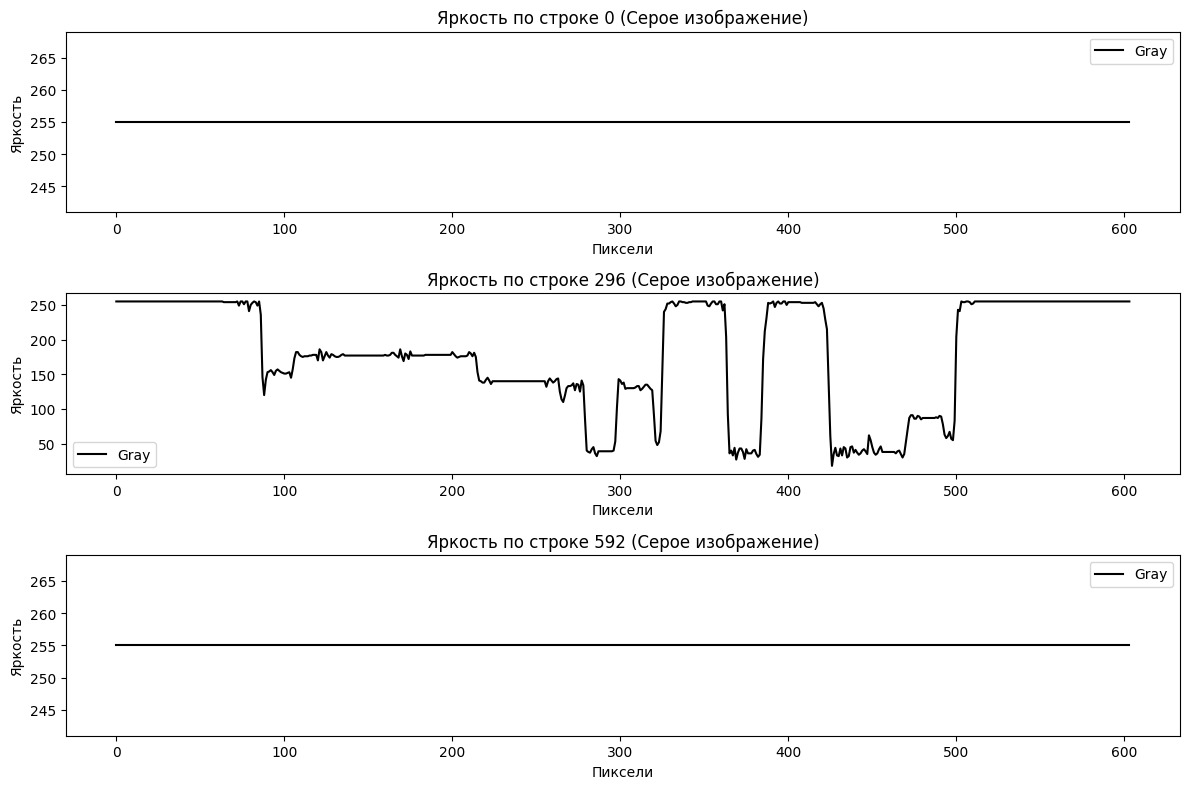

In [13]:
gray = Image.open('gray_image.jpg')
gray_array = np.array(gray)
image_array
height = image_array.shape[0]
rows = [0, height // 2, height - 1] # выберем верхнюю, среднюю и нижнюю строки
# Графики для цветных каналов
plt.figure(figsize=(12, 8))
for i, row in enumerate(rows):
    plt.subplot(len(rows), 1, i+1)
    plt.plot(r[row, :], color='red', label='Red')
    plt.plot(g[row, :], color='green', label='Green')
    plt.plot(b[row, :], color='blue', label='Blue')
    plt.title(f"Яркость по строке {row} (Цветные каналы)")
    plt.xlabel("Пиксели")
    plt.ylabel("Яркость")
    plt.legend()
plt.tight_layout()
plt.show()

# Графики для серого изображения
plt.figure(figsize=(12, 8))
for i, row in enumerate(rows):
    plt.subplot(len(rows), 1, i+1)
    plt.plot(gray_array[row, :], color='black', label='Gray')
    plt.title(f"Яркость по строке {row} (Серое изображение)")
    plt.xlabel("Пиксели")
    plt.ylabel("Яркость")
    plt.legend()
plt.tight_layout()
plt.show()

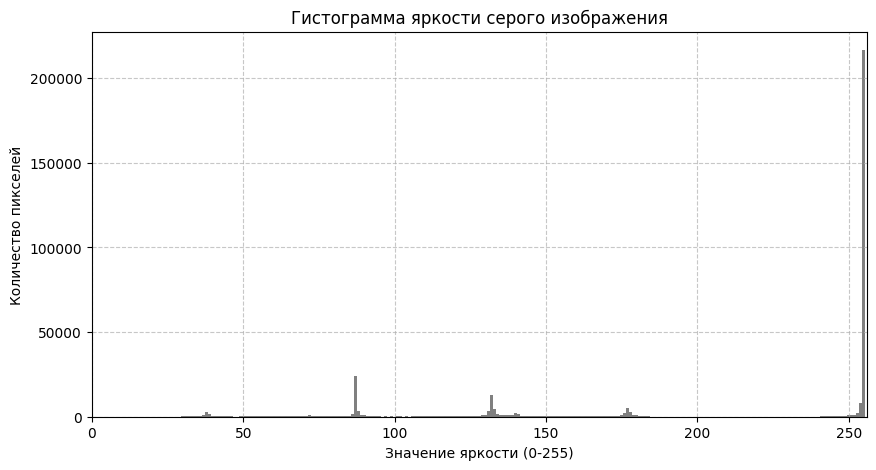

In [14]:
gray_array
hist, bins = np.histogram(gray_array.flatten(), bins=256, range=[0,256])

# Визуализация
plt.figure(figsize=(10, 5))
plt.bar(bins[:-1], hist, width=1, color='gray')
plt.title('Гистограмма яркости серого изображения')
plt.xlabel('Значение яркости (0-255)')
plt.ylabel('Количество пикселей')
plt.xlim([0, 256])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

* **Свертка изображения** — это операция, при которой каждый пиксель
результирующего изображения вычисляется как взвешенная сумма соседних пикселей исходного изображения с использованием ядра свертки
* **Ядро свертки** - матрица чисел, применяемая к данным для выделения признаков

При свертке **пиксели на границах** изображения не имеют достаточного количества соседей, то есть крайние пиксели не могут быть обработаны, так как у них нет соседей.

Чтобы решить эту задачу, исходный массив можно **дополнить новыми пикселями**. Например, в виде краевого поля, окружающего массив. Если в качестве значений берутся нули, говорят о «нулевом отступе» (zero padding), а если отраженные пиксели - зеркальный отступ (mirror padding).

In [15]:
import numpy as np

def mirror_padding(image, pad_size):
    """
    Добавляет зеркальное отражение краёв к изображению.

    Параметры:
        image: исходное изображение (2D numpy array).
        pad_size: размер padding (например, 1 для ядра 3x3).

    Возвращает:
        Расширенное изображение с отражёнными краями.
    """
    h, w = image.shape
    padded = np.zeros((h + 2 * pad_size, w + 2 * pad_size), dtype=image.dtype)

    # центр исходного изображения
    padded[pad_size:-pad_size, pad_size:-pad_size] = image

    # отражение верхней и нижней границы
    for y in range(pad_size):
        # верхняя граница: mirror y=pad_size-1, pad_size-2, ...
        padded[y, pad_size:-pad_size] = image[pad_size - y - 1, :]
        # нижняя граница: mirror y=h-1, h-2, ...
        padded[-y - 1, pad_size:-pad_size] = image[h - y - 1, :]

    # отражение левой и правой границы
    for x in range(pad_size):
        # левая граница: mirror x=pad_size-1, pad_size-2, ...
        padded[pad_size:-pad_size, x] = image[:, pad_size - x - 1]
        # правая граница: mirror x=w-1, w-2, ...
        padded[pad_size:-pad_size, -x - 1] = image[:, w - x - 1]

    # отражение по диагонали
    for y in range(pad_size):
        for x in range(pad_size):
            # левый верхний угол
            padded[y, x] = image[pad_size - y - 1, pad_size - x - 1]
            # правый верхний угол
            padded[y, -x - 1] = image[pad_size - y - 1, w - x - 1]
            # левый нижний угол
            padded[-y - 1, x] = image[h - y - 1, pad_size - x - 1]
            # правый нижний угол
            padded[-y - 1, -x - 1] = image[h - y - 1, w - x - 1]

    return padded

In [16]:
def apply_convolution(image, kernel):
    """Применяет свёртку изображения с ядром"""
    k_size = kernel.shape[0]
    pad_size = k_size // 2
    image_padded = mirror_padding(image, pad_size)

    h, w = image.shape
    output = np.zeros_like(image, dtype=np.float32)

    for x in range(h):
        for y in range(w):
            output[x, y] = np.sum(
                image_padded[x:x+k_size, y:y+k_size] * kernel
            )

    return output

####**Пороговая фильтрация**####

In [17]:
def otsu(image_array):
    """Реализация метода Оцу для нахождения оптимального порога"""
    # Преобразуем в серое изображение, если оно цветное
    if len(image_array.shape) == 3:
        gray = np.mean(image_array, axis=2).astype(np.uint8)
    else:
        gray = image_array

    # Вычисляем гистограмму
    hist, bins = np.histogram(gray.flatten(), bins=256, range=[0,256])

    # Нормализуем гистограмму
    hist_norm = hist / float(np.sum(hist))

    # Вычисляем кумулятивные суммы
    sum = np.cumsum(hist_norm)
    mean = np.cumsum(hist_norm * np.arange(256))

    # Общая средняя яркость
    global_mean = sum[-1]

    # Вычисляем межклассовую дисперсию для всех возможных порогов
    sigma_b_squared = []
    for t in range(1, 256):
        w0 = sum[t]
        w1 = 1 - w0
        if w0 == 0 or w1 == 0:
            continue
        mu0 = mean[t] / w0
        mu1 = (global_mean - mean[t]) / w1
        sigma_b_squared.append(w0 * w1 * (mu0 - mu1)**2)

    # Находим порог с максимальной дисперсией
    optimal_threshold = np.argmax(sigma_b_squared)

    return optimal_threshold

Оптимальный порог по методу Оцу: 253


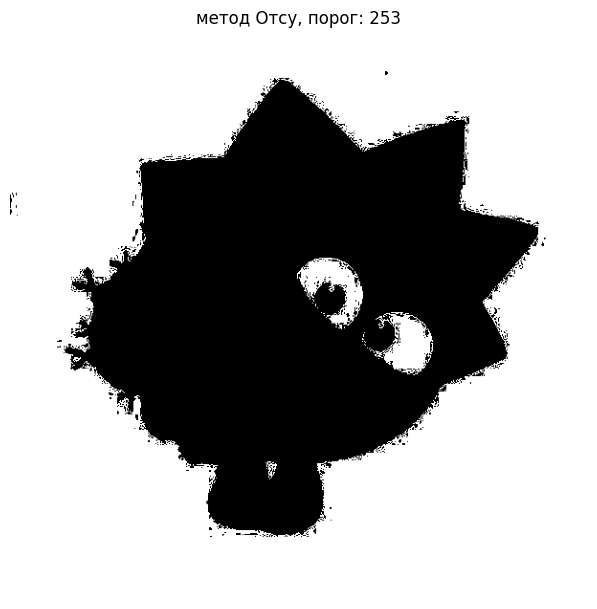

In [18]:
def apply_otsu(image_array, threshold):
    """Применение пороговой фильтрации"""
    gray = np.mean(image_array, axis=2) if len(image_array.shape) == 3 else image_array
    binary = np.zeros_like(gray)
    binary[gray > threshold] = 255
    return binary
gray_array
threshold = otsu(image_array)
print(f"Оптимальный порог по методу Оцу: {threshold}")

# Применение пороговой фильтрации
binary_image = apply_otsu(image_array, threshold)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title(f"метод Отсу, порог: {threshold}")
plt.axis('off')

plt.tight_layout()
plt.show()

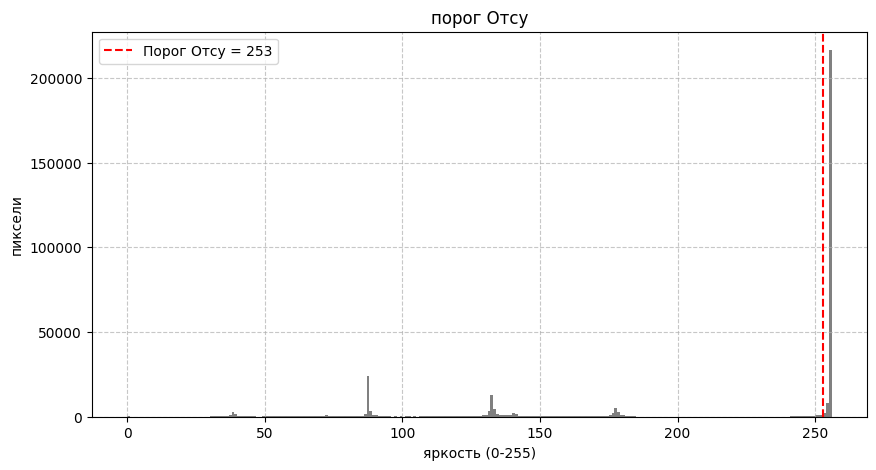

In [19]:
threshold = otsu(gray_array)

plt.figure(figsize=(10, 5))
plt.hist(gray_array.flatten(), bins=256, range=[0,256], color='gray')
plt.axvline(x=threshold, color='r', linestyle='--',
            label=f'Порог Отсу = {threshold}')
plt.title('порог Отсу')
plt.xlabel('яркость (0-255)')
plt.ylabel('пиксели')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

####**Медианный фильтр**####

In [ ]:
def manual_median_filter(image_array, window_size=3):
    """Применяет медианный фильтр """
    # Проверка размера окна
    if window_size % 2 == 0:
        raise ValueError("Размер окна должен быть нечетным")

    pad = window_size // 2
    h, w = image_array.shape
    filtered = np.zeros_like(image_array)

    # Добавляем зеркальные границы
    padded = mirror_padding(image_array, pad)

    for y in range(h):
        for x in range(w):
            # Вырезаем окрестность
            neighborhood = padded[y:y+window_size, x:x+window_size]
            # Находим медиану
            filtered[y, x] = np.median(neighborhood)

    return filtered

####**Фильтр Гаусса**####

In [20]:
def gaussian_kernel(size, sigma=1.0):
    """Создает Гауссово ядро заданного размера и sigma."""
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma**2)) *
                     np.exp(-((x - (size-1)/2)**2 + (y - (size-1)/2)**2) / (2 * sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)  # нормализация

def apply_convolution(image, kernel):
    """Применяет свертку изображения с ядром."""
    kernel_size = kernel.shape[0]
    pad = kernel_size // 2
    image_padded = mirror_padding(image, pad)

    output = np.zeros_like(image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            output[x, y] = np.sum(
                image_padded[x:x+kernel_size, y:y+kernel_size] * kernel
            )
    return output

####**Линейный усредняющий фильтр (box blur)**####

In [23]:
def square_matrix(square):
    """Вычисляет усреднённое значение пикселей для матрицы 3x3."""
    tot_sum = 0.0 #чтобы избежать переполнения
    for i in range(3):
        for j in range(3):
            tot_sum += square[i][j]  # суммируем все 9 пикселей
    return tot_sum // 9  # возвращаем среднее

In [24]:
def box_blur(image):
    """Применяет Box Blur ко всему изображению."""
    square = []      # Матрица 3x3 для текущего окна
    square_row = []  # Одна строка из 3 пикселей
    blur_row = []    # Результат размытия для одной строки изображения
    blur_img = []    # Итоговое размытое изображение

    n_rows = len(image)     # Число строк
    n_col = len(image[0])   # Число столбцов
    rp, cp = 0, 0           # Указатели на текущую позицию (row, column)

    while rp <= n_rows - 3:  # Пока не вышли за границы по строкам
        while cp <= n_col - 3:  # Пока не вышли за границы по столбцам
            for i in range(rp, rp + 3):
                for j in range(cp, cp + 3):
                    square_row.append(image[i][j])  # Собираем строку 3x3
                square.append(square_row)
                square_row = []

            blur_row.append(square_matrix(square))  # Добавляем усреднённый пиксель
            square = []
            cp += 1  # Перемещаемся вправо

        blur_img.append(blur_row)
        blur_row = []
        rp += 1  # Перемещаемся вниз
        cp = 0   # Сбрасываем указатель столбца

    return blur_img

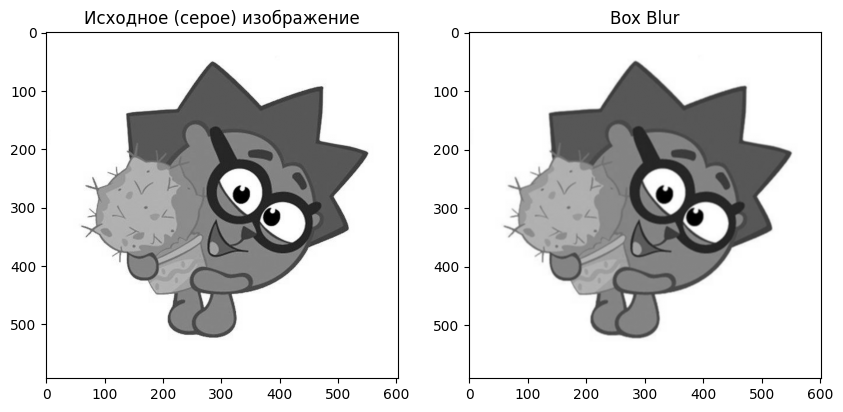

In [25]:
# визуализация
blur_img = box_blur(gray_array)
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(gray_array, cmap='gray'), plt.title('Исходное (серое) изображение')
plt.subplot(122), plt.imshow(blur_img, cmap='gray'), plt.title('Box Blur')
plt.show()

####**Фильтр Собеля**####

In [26]:
def sobel_filter_manual(image):
    # Ядра Собеля
    kernel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]], dtype=np.float32)

    kernel_y = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]], dtype=np.float32)

    # Применяем свёртки
    gx = apply_convolution(image, kernel_x)
    gy = apply_convolution(image, kernel_y)

    # Вычисляем градиент
    sobel = np.sqrt(gx**2 + gy**2)
    sobel = np.uint8(sobel / np.max(sobel) * 255)  # Нормализация

    return sobel, gx, gy

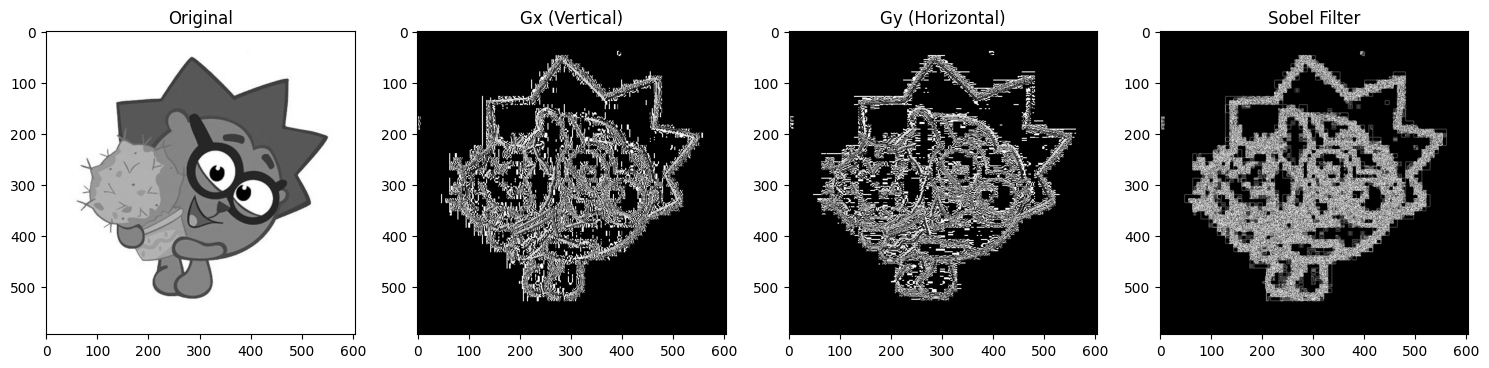

In [27]:
sobel, gx, gy = sobel_filter_manual(gray_array)

# Визуализация
plt.figure(figsize=(15, 5))
plt.subplot(141), plt.imshow(gray_array, cmap='gray'), plt.title('Original')
plt.subplot(142), plt.imshow(gx, cmap='gray'), plt.title('Gx (Vertical)')
plt.subplot(143), plt.imshow(gy, cmap='gray'), plt.title('Gy (Horizontal)')
plt.subplot(144), plt.imshow(sobel, cmap='gray'), plt.title('Sobel Filter')
plt.tight_layout()
plt.show()

##**Увеличение изображения**##

Реализация классического преобразования Фурье занимает довольно много времени (сложность O(N^2))

Уменьшим наше изображение до 2 550 пикселей (1,31 КБ)

In [28]:
# уменьшенная версия для Фурье
image = Image.open('hedgehog_s.jpg')
gray_image = image.convert("L")
gray_array = np.array(gray_image)


FileNotFoundError: [Errno 2] No such file or directory: 'hedgehog_s.jpg'

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def manual_dft_2d(image):
    M, N = image.shape
    dft = np.zeros((M, N), dtype=np.complex128)

    for u in range(M):
        for v in range(N):
            sum_val = 0.0
            for x in range(M):
                for y in range(N):
                    sum_val += image[x, y] * np.exp(-2j * np.pi * (u * x / M + v * y / N))
            dft[u, v] = sum_val
    return dft

def manual_idft_2d(dft):
    M, N = dft.shape
    image = np.zeros((M, N), dtype=np.float64)

    for x in range(M):
        for y in range(N):
            sum_val = 0.0
            for u in range(M):
                for v in range(N):
                    sum_val += dft[u, v] * np.exp(2j * np.pi * (u * x / M + v * y / N))
            image[x, y] = (sum_val / (M * N)).real
    return image

def fourier_interpolation(gray_array, scale_factor=2):
    M, N = gray_array.shape
    new_M, new_N = M * scale_factor, N * scale_factor

    # 1. Вычисляем ДПФ исходного изображения
    dft = manual_dft_2d(gray_array)

    # 2. Создаем увеличенный спектр с нулевыми высокими частотами
    padded_dft = np.zeros((new_M, new_N), dtype=np.complex128)

    # Переносим низкие частоты в углы (учет сдвига)
    padded_dft[:M//2, :N//2] = dft[:M//2, :N//2]  # Левый верхний
    padded_dft[:M//2, new_N - N//2:] = dft[:M//2, N//2:]  # Правый верхний
    padded_dft[new_M - M//2:, :N//2] = dft[M//2:, :N//2]  # Левый нижний
    padded_dft[new_M - M//2:, new_N - N//2:] = dft[M//2:, N//2:]  # Правый нижний

    # 3. Масштабируем амплитуду (т.к. добавили нулевые частоты)
    padded_dft *= (new_M * new_N) / (M * N)

    # 4. Обратное ДПФ увеличенного спектра
    enlarged_image = manual_idft_2d(padded_dft)

    return np.clip(enlarged_image, 0, 255).astype(np.uint8)



In [30]:
def fourier_interpolation(gray_array, scale_factor=2):
    M, N = gray_array.shape
    new_M, new_N = M * scale_factor, N * scale_factor

    # 1. Вычисляем ДПФ
    dft = manual_dft_2d(gray_array)

    # 2. Создаем увеличенный спектр с нулями
    padded_dft = np.zeros((new_M, new_N), dtype=np.complex128)

    # 3. Копируем частоты с учетом чётности/нечётности
    # Левый верхний квадрант
    m1, n1 = M // 2, N // 2
    padded_dft[:m1, :n1] = dft[:m1, :n1]

    # Правый верхний квадрант
    padded_dft[:m1, new_N - (N - n1):] = dft[:m1, n1:]

    # Левый нижний квадрант
    padded_dft[new_M - (M - m1):, :n1] = dft[m1:, :n1]

    # Правый нижний квадрант
    padded_dft[new_M - (M - m1):, new_N - (N - n1):] = dft[m1:, n1:]

    # 4. Масштабируем амплитуду
    padded_dft *= (new_M * new_N) / (M * N)

    # 5. Обратное ДПФ
    enlarged_image = manual_idft_2d(padded_dft)

    return np.clip(enlarged_image, 0, 255).astype(np.uint8)

In [ ]:
#проверим в действии)
if __name__ == "__main__":

    gray_array
    # Увеличиваем в 2 раза
    enlarged = fourier_interpolation(gray_array, scale_factor=2)

    # Визуализация
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 2)
    plt.title("Увеличенное (Фурье)")
    plt.imshow(enlarged, cmap='gray')
    plt.show()